üöÄ **Avance 3. Baseline**: Establecer las medidas de calidad del modelo de aprendizaje autom√°tico, Proporcionar un marco de referencia para evaluar y mejorar modelos m√°s avanzados.

üìë **Asignatura**: Proyecto Integrador

üìò **Proyecto**: LunchForecast AI: Optimizador de reservas de almuerzos empresariales basado en inteligencia artificial.

üìö **Equipo**: 44

üßë **Alumnos**:

Alberto Jos√© Garc√≠a Porras (Matr√≠cula No. **A01793509**)

Erick Johan Najera Olivero (Matr√≠cula No. **A01793506**)

Carlos Julio Le√≥n Caicedo (Matr√≠cula No. **A01793947**)

üë© **Profesores**:

Dra. Grettel Barcel√≥ Alonso

Dr. Luis Eduardo Falc√≥n Morales

Dr. Guillermo Mota

üìÖ Mayo 17 del 2024

In [222]:
#Importamos las librer√≠as que utilizaremos para la ejecuci√≥n de la actividad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


üë£**Obtener Datos**: Cargamos el archivo CSV con la informaci√≥n del consumo del casino desde enero del 2021 hasta marzo del 2024.

In [223]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumoOriginal = dfCasinoConsumo
dfCasinoConsumo.head()

Consecutivo  IdProducto  cod lector  Cod comedor  Identificacion persona  \
0       825979         2.0           0         1001                  100001   
1       825980         2.0           0         1001                  100002   
2       825981         2.0           0         1001                  100003   
3       825982         2.0           1         1001                  100004   
4       825983         2.0           0         1001                  100005   

  Fecha Consumo   Detalle  Nro empleados   Tipo Empleado Nivel  \
0    2021-01-03  ALMUERZO           3486       Operativo  OPER   
1    2021-01-03  ALMUERZO           3486  Administrativo  ANAL   
2    2021-01-03  ALMUERZO           3486       Operativo  OPER   
3    2021-01-03  ALMUERZO           3486       Operativo  OPER   
4    2021-01-03  ALMUERZO           3486  Administrativo  OPER   

   Porcentaje apoyo  Invitado  Ing x planta  
0                 0         0             1  
1                90         0             1  
2                 0         0             1  
3                90         0             1  
4                 0         0             1

In [224]:
# Convierte la columna 'fecha del consumo' a tipo datetime si a√∫n no lo est√°
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], format='%Y-%m-%d', errors='coerce')
#dfCasinoConsumo = dfCasinoConsumo.set_index('Fecha Consumo')
dfCasinoConsumo.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Consecutivo  IdProducto  cod lector  Cod comedor  Identificacion persona  \
0       825979         2.0           0         1001                  100001   
1       825980         2.0           0         1001                  100002   
2       825981         2.0           0         1001                  100003   
3       825982         2.0           1         1001                  100004   
4       825983         2.0           0         1001                  100005   

  Fecha Consumo   Detalle  Nro empleados   Tipo Empleado Nivel  \
0    2021-01-03  ALMUERZO           3486       Operativo  OPER   
1    2021-01-03  ALMUERZO           3486  Administrativo  ANAL   
2    2021-01-03  ALMUERZO           3486       Operativo  OPER   
3    2021-01-03  ALMUERZO           3486       Operativo  OPER   
4    2021-01-03  ALMUERZO           3486  Administrativo  OPER   

   Porcentaje apoyo  Invitado  Ing x planta  
0                 0         0             1  
1                90         0             1  
2                 0         0             1  
3                90         0             1  
4                 0         0             1

In [225]:
#Eliminamos las columnas que no consideramos relevantes seg√∫n hallazgos en la fase de exploraci√≥n
dfCasinoConsumo=dfCasinoConsumo.drop(columns=['Consecutivo', 'IdProducto', 'cod lector', 'Cod comedor', 'Identificacion persona', 'Invitado','Ing x planta','Nro empleados'])
dfCasinoConsumo.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fecha Consumo   Detalle   Tipo Empleado Nivel  Porcentaje apoyo
0    2021-01-03  ALMUERZO       Operativo  OPER                 0
1    2021-01-03  ALMUERZO  Administrativo  ANAL                90
2    2021-01-03  ALMUERZO       Operativo  OPER                 0
3    2021-01-03  ALMUERZO       Operativo  OPER                90
4    2021-01-03  ALMUERZO  Administrativo  OPER                 0

In [226]:

#En el an√°lisis, hab√≠amos notado que exist√≠an valores de 'ALMUERZO' en min√∫sculas en el campo 'DETALLE'
#Por lo anterior, procederemos a pasar a may√∫sculas el contenido de la columna antes de proceder con el borrado
dfCasinoConsumo['Detalle'] = dfCasinoConsumo['Detalle'].str.upper()

#Filtramos el dataFrame para conservar solo las filas donde 'DETALLE' es igual a 'ALMUERZO' y lo guardamos en un
#nuevo dataframe para evitar SettingWithCopyWarning
dfCasinoAlmuerzos = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == 'ALMUERZO'].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
#Creamos un nuevo dataframe para eliminar la fila mencionada
dfAlmuerzosDepurados = dfCasinoAlmuerzos.drop(dfCasinoAlmuerzos[dfCasinoAlmuerzos['Nivel'] == '#N/D'].index)


In [228]:
#Procedemos a realizar la codificaci√≥n de las columnas categ√≥ricas
dfCasinoAlmuerzosCodificado = pd.get_dummies(dfAlmuerzosDepurados, columns=['Tipo Empleado', 'Nivel', 'Porcentaje apoyo'])
dfCasinoAlmuerzosCodificado.head()

Fecha Consumo   Detalle  Tipo Empleado_Administrativo  \
0    2021-01-03  ALMUERZO                         False   
1    2021-01-03  ALMUERZO                          True   
2    2021-01-03  ALMUERZO                         False   
3    2021-01-03  ALMUERZO                         False   
4    2021-01-03  ALMUERZO                          True   

   Tipo Empleado_Aprendices  Tipo Empleado_Operativo  Nivel_ANAL  Nivel_ASIS  \
0                     False                     True       False       False   
1                     False                    False        True       False   
2                     False                     True       False       False   
3                     False                     True       False       False   
4                     False                    False       False       False   

   Nivel_AUXI  Nivel_COOR  Nivel_DIRE  Nivel_GERE  Nivel_JEFE  Nivel_OPER  \
0       False       False       False       False       False        True   
1       False       False       False       False       False       False   
2       False       False       False       False       False        True   
3       False       False       False       False       False        True   
4       False       False       False       False       False        True   

   Nivel_SENA  Nivel_VICE  Nivel_coor  Porcentaje apoyo_0  \
0       False       False       False                True   
1       False       False       False               False   
2       False       False       False                True   
3       False       False       False               False   
4       False       False       False                True   

   Porcentaje apoyo_30  Porcentaje apoyo_90  Porcentaje apoyo_100  
0                False                False                 False  
1                False                 True                 False  
2                False                False                 False  
3                False                 True                 False  
4                False                False                 False

In [229]:
#Para que el modelo que desarrollaremos m√°s adelante funcione de una mejor manera,
#procederemos a convertir los valores booleanos a n√∫meros.
#Recorremos todas las columnas y al identificar una booleana, la convertiremos en n√∫mero.
for col in dfCasinoAlmuerzosCodificado.columns:
    if dfCasinoAlmuerzosCodificado[col].dtype == bool:
        dfCasinoAlmuerzosCodificado[col] = dfCasinoAlmuerzosCodificado[col].astype(int)

dfCasinoAlmuerzosCodificado.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fecha Consumo   Detalle  Tipo Empleado_Administrativo  \
0    2021-01-03  ALMUERZO                             0   
1    2021-01-03  ALMUERZO                             1   
2    2021-01-03  ALMUERZO                             0   
3    2021-01-03  ALMUERZO                             0   
4    2021-01-03  ALMUERZO                             1   

   Tipo Empleado_Aprendices  Tipo Empleado_Operativo  Nivel_ANAL  Nivel_ASIS  \
0                         0                        1           0           0   
1                         0                        0           1           0   
2                         0                        1           0           0   
3                         0                        1           0           0   
4                         0                        0           0           0   

   Nivel_AUXI  Nivel_COOR  Nivel_DIRE  Nivel_GERE  Nivel_JEFE  Nivel_OPER  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           0   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   Nivel_SENA  Nivel_VICE  Nivel_coor  Porcentaje apoyo_0  \
0           0           0           0                   1   
1           0           0           0                   0   
2           0           0           0                   1   
3           0           0           0                   0   
4           0           0           0                   1   

   Porcentaje apoyo_30  Porcentaje apoyo_90  Porcentaje apoyo_100  
0                    0                    0                     0  
1                    0                    1                     0  
2                    0                    0                     0  
3                    0                    1                     0  
4                    0                    0                     0

In [230]:
#Ajustamos la fecha tipo datetime como preparaci√≥n para realizar el agrupamiento de los datos
dfCasinoAlmuerzosCodificado['Fecha Consumo'] = pd.to_datetime(dfCasinoAlmuerzosCodificado['Fecha Consumo'])

#Calculamos la cantidad de almuerzos por fecha y las otras columnas categ√≥ricas del dataframe
dfCantidad_Almuerzos = dfCasinoAlmuerzosCodificado.groupby(['Fecha Consumo'] + list(dfCasinoAlmuerzosCodificado.columns.difference(['Fecha Consumo', 'Detalle']))).size().reset_index(name='Cantidad_Almuerzos')

#Fusionamos el dataframe que venimos trabajando con el dataframe de la cantidad de almuerzos, eliminando posibles registros duplicados
dfCasinoAlmuerzosAgrupado = pd.merge(dfCasinoAlmuerzosCodificado, dfCantidad_Almuerzos.drop_duplicates(), on=['Fecha Consumo'] + list(dfCasinoAlmuerzosCodificado.columns.difference(['Fecha Consumo', 'Detalle'])), how='left')

dfCasinoAlmuerzosAgrupado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fecha Consumo   Detalle  Tipo Empleado_Administrativo  \
0         2021-01-03  ALMUERZO                             0   
1         2021-01-03  ALMUERZO                             1   
2         2021-01-03  ALMUERZO                             0   
3         2021-01-03  ALMUERZO                             0   
4         2021-01-03  ALMUERZO                             1   
...              ...       ...                           ...   
523879    2024-03-20  ALMUERZO                             1   
523880    2024-03-21  ALMUERZO                             1   
523881    2024-03-22  ALMUERZO                             1   
523882    2024-03-26  ALMUERZO                             1   
523883    2024-03-27  ALMUERZO                             1   

        Tipo Empleado_Aprendices  Tipo Empleado_Operativo  Nivel_ANAL  \
0                              0                        1           0   
1                              0                        0           1   
2                              0                        1           0   
3                              0                        1           0   
4                              0                        0           0   
...                          ...                      ...         ...   
523879                         0                        0           1   
523880                         0                        0           1   
523881                         0                        0           1   
523882                         0                        0           1   
523883                         0                        0           0   

        Nivel_ASIS  Nivel_AUXI  Nivel_COOR  Nivel_DIRE  ...  Nivel_JEFE  \
0                0           0           0           0  ...           0   
1                0           0           0           0  ...           0   
2                0           0           0           0  ...           0   
3                0           0           0           0  ...           0   
4                0           0           0           0  ...           0   
...            ...         ...         ...         ...  ...         ...   
523879           0           0           0           0  ...           0   
523880           0           0           0           0  ...           0   
523881           0           0           0           0  ...           0   
523882           0           0           0           0  ...           0   
523883           0           0           0           0  ...           0   

        Nivel_OPER  Nivel_SENA  Nivel_VICE  Nivel_coor  Porcentaje apoyo_0  \
0                1           0           0           0                   1   
1                0           0           0           0                   0   
2                1           0           0           0                   1   
3                1           0           0           0                   0   
4                1           0           0           0                   1   
...            ...         ...         ...         ...                 ...   
523879           0           0           0           0                   0   
523880           0           0           0           0                   0   
523881           0           0           0           0                   0   
523882           0           0           0           0                   0   
523883           1           0           0           0                   0   

        Porcentaje apoyo_30  Porcentaje apoyo_90  Porcentaje apoyo_100  \
0                         0                    0                     0   
1                         0                    1                     0   
2                         0                    0                     0   
3                         0                    1                     0   
4                         0                    0                     0   
...                     ...                  ...                   ...   
52387

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


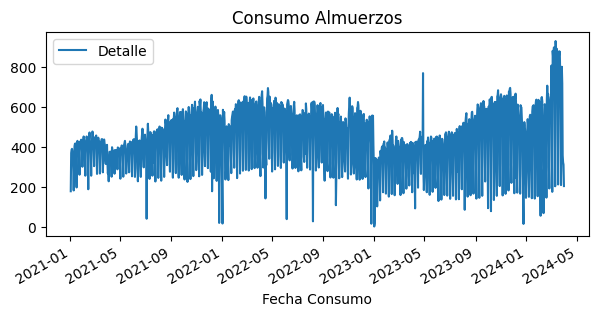

In [231]:
#visualizaci√≥n de la serie vs total de almuerzos
grouped = dfCasinoAlmuerzosCodificado.groupby('Fecha Consumo').agg({ 'Detalle': 'count'})

fig, ax=plt.subplots(figsize=(7, 3))
grouped.plot(ax=ax, label='Detalle')

ax.set_title('Consumo Almuerzos')
ax.legend();


In [235]:
datos = dfCasinoAlmuerzosCodificado[['Fecha Consumo', 'Detalle']]
#datos = datos.rename(columns={'Fecha Consumo':'date', 'Detalle':'Consumo'})
datos['Fecha Consumo'] = pd.to_datetime(datos['Fecha Consumo'], format='%Y-%m-%d')
datos = datos.set_index('Fecha Consumo')
datos = datos.loc[:'2024-03-30 00:00:00']
#datos = datos.asfreq('MS')
#datos = datos['Consumo']
#datos.columns = ['Fecha Consumo','Consumo']
display(datos.head(4))

<ipython-input-235-08dfc9e4f63f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha Consumo'] = pd.to_datetime(datos['Fecha Consumo'], format='%Y-%m-%d')


Detalle
Fecha Consumo          
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO

In [236]:
dfCasinoAlmuerzosCodificado = datos
#dfCasinoAlmuerzosCodificado = dfCasinoAlmuerzosCodificado.set_index('Fecha Consumo')
#dfCasinoAlmuerzosCodificado = dfCasinoAlmuerzosCodificado['Detalle']
# Fechas Train-test
# ======================================================================================
fin_train = '2023-09-30'
print(
    f"Fechas train : {dfCasinoAlmuerzosCodificado.index.min()} --- {dfCasinoAlmuerzosCodificado.loc[:fin_train].index.max()}  "
    f"(n={len(dfCasinoAlmuerzosCodificado.loc[:fin_train])})"
)
print(
    f"Fechas test  : {dfCasinoAlmuerzosCodificado.loc[fin_train:].index.min()} --- {dfCasinoAlmuerzosCodificado.loc[:].index.max()}  "
    f"(n={len(dfCasinoAlmuerzosCodificado.loc[fin_train:])})"
)
datos_train = dfCasinoAlmuerzosCodificado.loc[:fin_train]
datos_test  = dfCasinoAlmuerzosCodificado.loc[fin_train:]



Fechas train : 2021-01-03 00:00:00 --- 2023-09-30 00:00:00  (n=431617)
Fechas test  : 2023-09-30 00:00:00 --- 2024-03-30 00:00:00  (n=92402)


In [237]:
#grouped_train = datos_train.groupby('Fecha Consumo').agg({ 'Detalle': 'count'})
#grouped_test = datos_test.groupby('Fecha Consumo').agg({ 'Detalle': 'count'})
#grouped_train = datos_train.groupby('date').agg({ 'Consumo': 'count'})
#grouped_test = datos_test.groupby('date').agg({ 'Consumo': 'count'})
datos_train

Detalle
Fecha Consumo          
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
2021-01-03     ALMUERZO
...                 ...
2022-12-21     ALMUERZO
2022-12-22     ALMUERZO
2022-12-23     ALMUERZO
2022-12-27     ALMUERZO
2022-12-29     ALMUERZO

[431617 rows x 1 columns]

In [238]:
grouped_train = datos_train.groupby('Fecha Consumo')['Detalle'].count()
grouped_test = datos_test.groupby('Fecha Consumo')['Detalle'].count()

In [239]:
grouped_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fecha Consumo
2021-01-03    178
2021-01-04    370
2021-01-05    386
2021-01-06    391
2021-01-07    377
             ... 
2023-09-26    569
2023-09-27    566
2023-09-28    592
2023-09-29    555
2023-09-30    339
Name: Detalle, Length: 999, dtype: int64

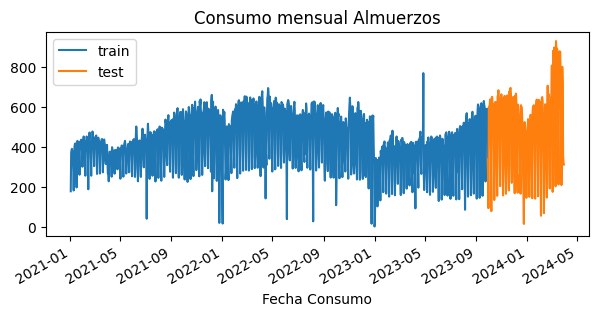

In [240]:
# Gr√°fico
# ======================================================================================
fig, ax=plt.subplots(figsize=(7, 3))
grouped_train.plot(ax=ax, label='train')
grouped_test.plot(ax=ax, label='test')
ax.set_title('Consumo mensual Almuerzos')
ax.legend();

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.4731656202966716, p-value: 0.008703602748095377
KPSS Statistic: 1.1755548738439585, p-value: 0.01

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -10.316328232064834, p-value: 3.0904357865978174e-18
KPSS Statistic: 0.07477478068387071, p-value: 0.1


<Axes: title={'center': 'Diferenciaci√≥n orden 1'}, xlabel='Fecha Consumo'>

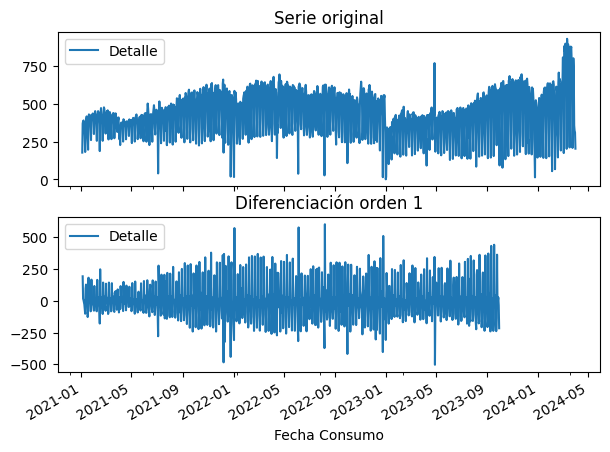

In [123]:
# Test estacionariedad
# ==============================================================================
warnings.filterwarnings("ignore")

datos_diff_1 = grouped_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(grouped)
kpss_result = kpss(grouped)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(grouped.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

# Gr√°fico series
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), sharex=True)
grouped.plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciaci√≥n orden 1')


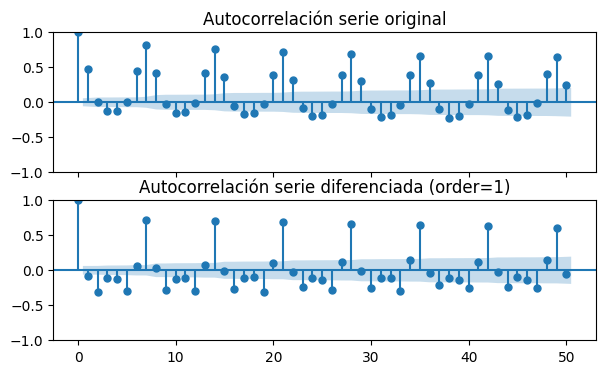

In [124]:
# Grafico de autocorrelaci√≥n para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(grouped, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelaci√≥n serie original')
plot_acf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelaci√≥n serie diferenciada (order=1)');

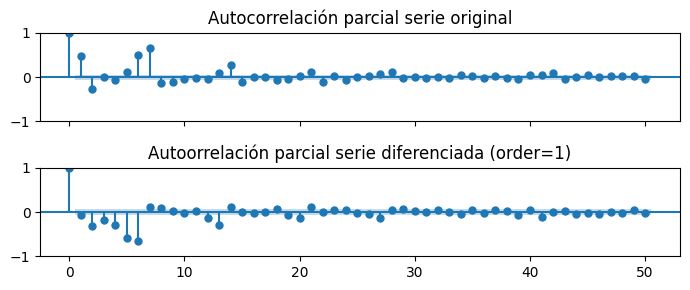

In [125]:
# Autocorrelaci√≥n parcial para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 3), sharex=True)
plot_pacf(grouped, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelaci√≥n parcial serie original')
plot_pacf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autoorrelaci√≥n parcial serie diferenciada (order=1)');
plt.tight_layout();


‚òù  **¬øQu√© algoritmo se puede utilizar como baseline para predecir las variables objetivo?**


In [241]:
# Modelo SARIMAX con statsmodels.Sarimax
# ==============================================================================
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = SARIMAX(endog = grouped_train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = modelo.fit(disp=0)
warnings.filterwarnings("default")
modelo_res.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Detalle   No. Observations:                  999
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6128.223
Date:                            Sat, 18 May 2024   AIC                          12266.447
Time:                                    21:20:18   BIC                          12290.915
Sample:                                         0   HQIC                         12275.753
                                            - 999                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5254      0.024     21.559      0.000       0.478       0.573
ma.L1         -0.9998      0.025    -39.353      0.000      -1.050      -0.950
ar.S.L12      -0.2050      0.035     -5.929      0.000      -0.273      -0.137
ma.S.L12      -0.9998      3.386     -0.295      0.768      -7.636       5.636
sigma2      1.366e+04   4.59e+04      0.297      0.766   -7.64e+04    1.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.19   Jarque-Bera (JB):                25.20
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [242]:
# Predicciones
pred = modelo_res.get_prediction(start=0, end=len(grouped_train)-1)
pred_mean = pred.predicted_mean

# Calcular m√©tricas
mse = mean_squared_error(grouped_train, pred_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(grouped_train, pred_mean)
mape = np.mean(np.abs((grouped_train - pred_mean) / grouped_train)) * 100
r2 = r2_score(grouped_train, pred_mean)
aic = modelo_res.aic
bic = modelo_res.bic

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R¬≤: {r2}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

MSE: 14293.02284928066
RMSE: 119.55343093897665
MAE: 91.39936536720289
MAPE: 79.20182049688381
R¬≤: 0.2017671947989721
AIC: 12266.44680359833
BIC: 12290.915085371344


In [243]:
#grouped_test['Fecha Consumo'] = pd.to_datetime(grouped_test['Fecha Consumo'])
# Predicci√≥n
# ==============================================================================
predicciones_statsmodels = modelo_res.get_forecast(steps=len(grouped_test)).predicted_mean
predicciones_statsmodels.name = 'predicciones_statsmodels'
display(predicciones_statsmodels.head(4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


999     368.060522
1000    370.159771
1001    390.645452
1002    376.589000
Name: predicciones_statsmodels, dtype: float64

In [75]:
grouped_test.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Detalle
Fecha Consumo         
2023-09-30         339
2023-10-01          93
2023-10-02         602
2023-10-03         603
2023-10-04         604

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


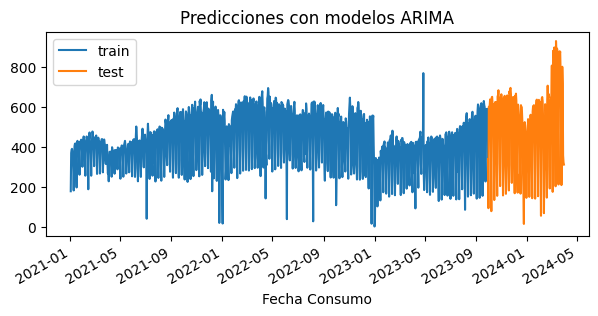

In [245]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
grouped_train.plot(ax=ax, label='train')
grouped_test.plot(ax=ax, label='test')
#predicciones_statsmodels.plot(ax=ax, label='statsmodels')
#predicciones_skforecast.columns = ['skforecast']
#predicciones_skforecast.plot(ax=ax, label='skforecast')
#predicciones_pdmarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend();